In many countries, there are bikesharing programs where anyone can rent a bike from a depot, and return it at other depots throughout a city. There is one such program in Washington, D.C., in the US. We'll be looking at the number of bikes that were rented by day. Here are the relevant columns:

    - dteday -- the date that we're looking at.
    - cnt -- the total number of bikes rented.
This data was collected by Hadi Fanaee-T at the University of Porto, and can be downloaded [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Many commonly occurring events can be expressed in terms of binomial outcomes -- a coin flip, winning a football game, the stock market going up, and more. A binomial outcome is where there are two values, which add to 1 collectively. There's a 100% chance of one outcome or the other occurring.

When we deal with binomial probabilities, we're often interested in the chance of a certain outcome happening in a sequence. We want to know what the chances are of our favorite football team winning 5 of its next 6 games, and the stock market going up in 4 of the next 6 days.
The same interest applies when we're analyzing data. Companies and researchers conduct experiments every day. These can range from testing whether changing the button color on your webpage increases conversion rate to seeing if a new drug increases patient recovery rate.
The core of these tests is the idea of a binomial distribution -- we want to know how many visitors out of 100 would normally sign up for our website, and we want to know if changing our button color affected that probability.
One easy way to visualize binomials is a binomial distribution. Given N events, it plots the probabilities of getting different numbers of successful outcomes.

Let's say we're working for the mayor of Washington, DC, Muriel Bowser. She wants to know on how many days out of the next 30 we can expect more than 5000 riders.

Rather than give her an exact number, which may not be accurate, we can hedge our bets with a probability distribution. This will show her all the possibilities, along with probabilities for each.

First, we have to find the probability of there being more than 5000 riders in a single day.

In [2]:
import pandas
bikes = pandas.read_csv("bike_rental_day.csv")

# Let's apply the formula for a probability of an event, e, occuring against all possible events, E : P(e) / P(E)
prob_over_5000 = bikes[bikes["cnt"] > 5001].shape[0] / bikes["cnt"].shape[0]

prob_over_5000

0.3912448700410397

.39 is the probability of a day having more than 5000 riders. But what then for two days or more then ? We can use the formula :

$(p^{k} * q^{N-k}) * \frac{N!}{k!(N-k)!} = $
$(.39^{k} * .61^{30-k}) * \frac{30!}{k!(30-k)!}$

where p is the probability of an event occuring (.39 in our case), q is the probability of an event not occuring (.61), N is the x-axis of our probability distribution (list from 0 to 30 days) and k the y-axis of the distribution (ranging from 0 to 1). We can compute a probability distribution :

In [3]:
import math

# Each item in this list represents one k, starting from 0 and going up to and including 30.
outcome_counts = list(range(31))

def find_probability(N, k, p, q):
    # Find the probability of any single combination.
    term_1 = p ** k
    term_2 = q ** (N-k)
    combo_prob = term_1 * term_2
    
    # Find the number of combinations.
    numerator = math.factorial(N)
    denominator = math.factorial(k) * math.factorial(N - k)
    combo_count = numerator / denominator
    
    return combo_prob * combo_count

outcome_probs = [find_probability(30, i, .39, .61) for i in outcome_counts]

outcome_probs[:5]

[3.6299032553937196e-07,
 6.962273457066644e-06,
 6.454369901592111e-05,
 0.0003851460072425456,
 0.0016621260066655757]

And plot it :

In [5]:
%matplotlib inline

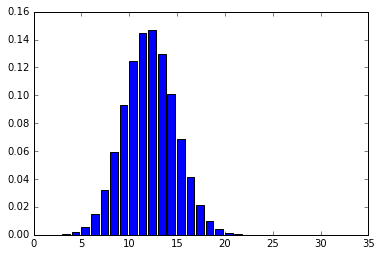

In [6]:
import matplotlib.pyplot as plt

# The most likely number of days is between 10 and 15 since the odds are 2/3.
plt.bar(outcome_counts, outcome_probs)
plt.show()

To construct our distribution, we had to write our own custom function, and a decent amount of code. We can instead use the *binom.pmf* function from SciPy to do this faster.

The pmf function in SciPy is an implementation of the mathematical probability mass function. The *pmf* will give us the probability of each k in our **outcome_counts** list occurring.

A binomial distribution only needs two parameters. A parameter is the statistical term for a number that summarizes data for the entire population. For a binomial distribution, the parameters are:

    • N, the total number of events,
    • p, the probability of the outcome we're interested in seeing.
The SciPy function pmf matches this and takes in the following parameters:

    • x: the list of outcomes,
    • n: the total number of events,
    • p: the probability of the outcome we're interested in seeing.
Because we only need two parameters to describe a distribution, it doesn't matter whether we want to know if it will be sunny 5 days out of 5, or if 5 out of 5 coin flips will turn up heads. As long as the outcome that we care about has the same probability (p), and N is the same, the binomial distribution will look the same.

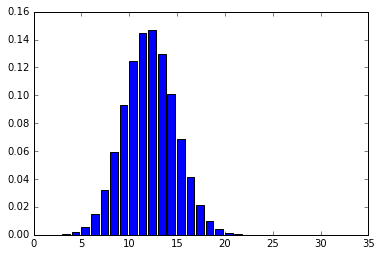

In [7]:
import scipy
from scipy import linspace
from scipy.stats import binom

# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)

prob_distrib = binom.pmf(outcome_counts,30,.39)
plt.bar(outcome_counts, prob_distrib)
plt.show()

We can also compute the most likely number of days that have more than 5000 riders : 

$p * N = 0.39 * 30$

In [8]:
dist_mean = 30 * .39

import numpy as np
print ("The most like number of days having the most bikers is : ", np.round(dist_mean))

The most like number of days having the most bikers is :  12.0


Just as we can compute the mean, we can also compute the standard deviation of a probability distribution. This helps us find how much the actual values will vary from the mean when we take a sample.

Going back to the bikesharing example, we know that the actual values will be around 11.7 (from the last screen). But, we'll need a standard deviation to explain how much the actual values can vary from this expectation.

The formula for standard deviation of a probability distribution is:

$\sqrt{N*p*q}$

In [41]:
dist_stdev = np.sqrt(30 * .39 * .61)

print("The standard deviation of the probability distribution is",dist_stdev,". We can plot the standard deviations as well")

The standard deviation of the probability distribution is 2.67151642331 . We can plot the standard deviations as well


In [42]:
import seaborn as sns

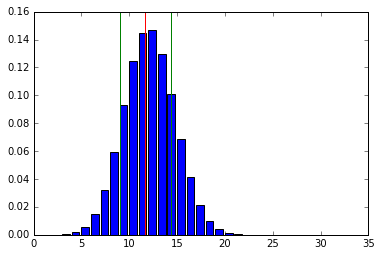

In [55]:
plt.bar(outcome_counts, prob_distrib)
plt.axvline(dist_mean, linewidth = 1, color = "r")
plt.axvline(dist_mean - dist_stdev, linewidth = 1, color = "g")
plt.axvline(dist_mean + dist_stdev, linewidth = 1, color = "g")

Let's try to get a binomial distribution for a different number of events :

In [60]:
outcome_counts_10 = linspace(0,10,11)
prob_distrib_10 = binom.pmf(outcome_counts_10, 10,.39)

dist_stdev_10 = np.sqrt(10 * .39 * .61)
dist_mean_10 = 10 * .39

print("The standard deviation of the probability distribution is",dist_stdev_10,". We can plot the standard deviations as well")

The standard deviation of the probability distribution is 1.54240072614 . We can plot the standard deviations as well


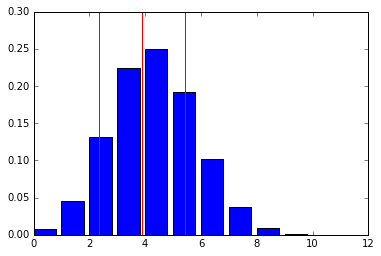

In [61]:
plt.bar(outcome_counts_10, prob_distrib_10)
plt.axvline(dist_mean_10, linewidth = 1, color = "r")
plt.axvline(dist_mean_10 - dist_stdev_10, linewidth = 1, color = "g")
plt.axvline(dist_mean_10 + dist_stdev_10, linewidth = 1, color = "g")

In [69]:
outcome_counts_100 = linspace(0,100,101)
prob_distrib_100 = binom.pmf(outcome_counts_100, 100,.39)

dist_stdev_100 = np.sqrt(100 * .39 * .61)
dist_mean_100 = 100 * .39

print("The most likely is ", np.int(dist_mean_100), "days that have the highest number of bicycle riders")
print("The standard deviation of the probability distribution is",dist_stdev_100,". We can plot the standard deviations as well")

The most likely is  39 days that have the highest number of bicycle riders
The standard deviation of the probability distribution is 4.8774993593 . We can plot the standard deviations as well


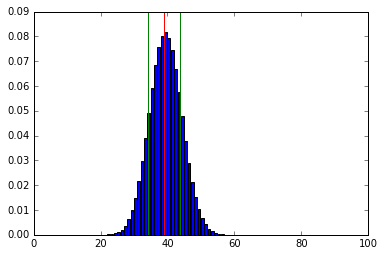

In [72]:
plt.bar(outcome_counts_100, prob_distrib_100)
plt.xlim(0,100)
plt.axvline(dist_mean_100, linewidth = 1, color = "r")
plt.axvline(dist_mean_100 - dist_stdev_100, linewidth = 1, color = "g")
plt.axvline(dist_mean_100 + dist_stdev_100, linewidth = 1, color = "g")

The more events we look at, the closer our distribution is to being normal. With N=10, we saw some rightward skew, but when we got up to N=100, the skew disappeared.

This is because the distribution got narrower relative to the x-axis range the more examples we add. With N=10, there's a reasonable chance that 8 to 10 days could have over 5000 riders. But, when we get up to N=100, it's statistically almost impossible that more than 60 days have over 5000 riders. This makes the distribution narrower.

As the distribution gets narrower, it gets more similar to the normal distribution. Let's plot a line chart instead of a bar chart and it looks almost exactly like a normal distribution.

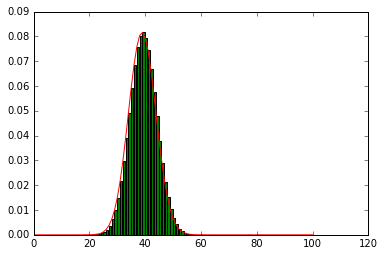

In [93]:
plt.bar(outcome_counts_100, prob_distrib_100, color = "g")
plt.plot(outcome_counts_100, prob_distrib_100, color = "r")

In [ ]:
from scipy import linspace
from scipy.stats import binom

# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)

# Create the cumulative binomial probabilities, one for each entry in outcome_counts.
dist = binom.cdf(outcome_counts,30,0.39)

We can calculate z-scores (the number of standard deviations away from the mean a probability is) fairly easily. These z-scores can then be used to find the percentage of values to the left and right of the value we're looking at.

To make this more concrete, say we had 16 days where we observed more than 5000 riders. Is this likely? Unlikely? Using a z-score, we can figure out exactly how common this event is.

This is because every normal distribution, as we learned in an earlier mission, has the same properties when it comes to what percentage of the data is within a certain number of standard deviations of the mean. You can look these up in a standard normal table. About 68% of the data is within 1 standard deviation of the mean, 95% is within 2, and 99% is within 3.

We can calculate the mean (μ) and standard deviation (σ) of a binomial probability distribution using the formulas from earlier:

$μ=N∗p$

$σ=N∗p∗q$

If we want to figure out the number of standard deviations from the mean a value is, we just do:

$k−μσ*

If we wanted to find how many standard deviations from the mean 16 days is:

$16−μσ = $

$16−(30∗.39)30∗.39∗.61= $

$4.32.67= $

$1.61$

This tells us that 16 days is approximately 1.61 standard deviations above the mean. In percentage form, this captures about 44.63% of our data. If we also include 1.61 standard deviations below the mean(both sides of distribution), this'll include 89.26% of our data.

There's a 5.37% chance that a value is 1.61 standard deviations or more above the mean (to the right of the mean), and there's a 5.37% chance that a value is 1.61 standard deviations below the mean (to the left).

We don't want to have to use a z-score table every time we want to see how likely or unlikely a probability is. A much faster way is to use the cumulative distribution fuction (cdf) like we did earlier. This won't give us the exact same values as using z-scores, because the distribution isn't exactly normal, but it will give us the actual amount of probability in a distribution to the left of a given k.

To use it, we can run:

The sum of all the probabilities to the left of k, including k.
    
    left = binom.cdf(k,N,p)

The sum of all probabilities to the right of k.
    
    right = 1 - left

This will return the sum of all the probabilities to the left of and including k. If we subtract this value from 1, we get the sum of all the probabilities to the right of k.

In [99]:
left_16 = binom.cdf(16,30,.39)
right_16 = 1-left_16

print("There is ", left_16*100, "% of the values at the left of k = 16. Meaning there is", left_16*100, "of the probabilities at the", 
      "left of the value")

There is  96.2300376605 % of the values at the left of k = 16. Meaning there is 96.2300376605 of the probabilities at the left of the value
